# Building K Nearest Neighbours from scratch


### Importing Necessary libraries and building kNN function logic

In [1]:
import numpy as np
from statistics import mode
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append((group,euclidean_distance))
    votes = [group for (group,euclidean_distance) in sorted(distances,key=lambda x:x[1])][:k]
    vote_result=mode(votes)
    return vote_result

### Function to plot Confusion Matrix and Experimental results

In [2]:
def plot_confusion_matrix(actual_target_list,predicted_target_list,classes_list):
    conf_mat=[]
    actual_target_list=list(actual_target_list)
    for aclass in classes_list:
        row_list=[]
        for pclass in classes_list:
            row_list.append(sum(pd.Series(predicted_target_list)[pd.Series(actual_target_list)==aclass]==pclass))
        conf_mat.append(row_list)
    hw=len(classes_list)*1.5
    fig, ax = plt.subplots(figsize=(hw,hw/2))
    heatmap=sns.heatmap(conf_mat,
            xticklabels=classes_list,yticklabels=classes_list,
            annot=True,cbar=False,ax=ax,fmt='g',cmap='Blues',
                       linewidths=0.3, linecolor='black')


    ax.set(xlabel='Predicted',ylabel='Actual')
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position("top")
    plt.show()
    return conf_mat

In [3]:
def plot_experimental_results(conf_matrix_list):
    TP=conf_matrix_list[1][1]
    FP=conf_matrix_list[0][1]
    TN=conf_matrix_list[0][0]
    FN=conf_matrix_list[1][0]
    
    Recall=TP/(TP+FN)
    FP_rate=FP/(FP+TN)
    Precision=TP/(TP+FP)
    F1_measure=2*Precision*Recall/(Precision+Recall)
    
    plt.subplots(figsize=(4,4))
    plt.bar([0.3,1.3,2.3,3.3],[Recall,FP_rate,Precision,F1_measure],0.3)
    the_table = plt.table(cellText=[[Recall,FP_rate,Precision,F1_measure]],
                      rowLabels=['Value'],
                      colLabels=('Recall','FP Rate','Precision','F-Measure'),
                     loc='bottom')
    plt.subplots_adjust(left=0,right=2,top=1, bottom=0)
    plt.xticks([])

### Make ready the train_set
1. Read the train datasets from csv files
2. Define the classes_list,training and target columns
3. Select the features according to the training columns
4. Clean any NaN or Null values in the Data (I have not decided to replace NaN values with a numerical value. That's why I am cleaning them up in order to avoid code integration issues)
5. Determining the data types of the training dataset features and Label Encode the features which are non-numerical
6. Finally create the train_set dictionary i.e.
    - Keys are different prediction classes
    - Values are list of lists containing all the training data records

#### steps 1 to 4

In [4]:
df = pd.read_csv('train.csv')
df_cleaned=df[[col for col in df.columns if col not in ['Cabin','PassengerId','Name','Ticket']]]
df_cleaned=df_cleaned[~df_cleaned.isnull().any(axis=1)]

all_cols=[col for col in df_cleaned.columns]
target_col='Survived'
classes_list=list(df[target_col].unique())
training_cols=[col for col in all_cols if col!=target_col]
training_cols,target_col

(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], 'Survived')

#### 5. Determining the data types of the training dataset features

In [5]:
df_cleaned.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

#### 5. Label Encoding the non-numerical features

In [6]:
Sex_E=list(df_cleaned['Sex'].unique())
Embarked_E=list(df_cleaned['Embarked'].unique())
Sex_E,Embarked_E

(['male', 'female'], ['S', 'C', 'Q'])

In [7]:
for val in Sex_E:
    df_cleaned.replace(val,Sex_E.index(val),inplace=True)
for val in Embarked_E:
    df_cleaned.replace(val,Embarked_E.index(val),inplace=True)
df_cleaned

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
885,0,3,1,39.0,0,5,29.1250,2
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
889,1,1,0,26.0,0,0,30.0000,1


#### 6. Finally creating the training set which is a dictionary

In [8]:
train_set={}
for e_class in classes_list:
    train_set[e_class]=[]
    
for index,row in df_cleaned.iterrows():
     train_set[row[target_col]].append(list(row[training_cols]))
train_set

{0: [[3.0, 0.0, 22.0, 1.0, 0.0, 7.25, 0.0],
  [3.0, 0.0, 35.0, 0.0, 0.0, 8.05, 0.0],
  [1.0, 0.0, 54.0, 0.0, 0.0, 51.8625, 0.0],
  [3.0, 0.0, 2.0, 3.0, 1.0, 21.075, 0.0],
  [3.0, 0.0, 20.0, 0.0, 0.0, 8.05, 0.0],
  [3.0, 0.0, 39.0, 1.0, 5.0, 31.275, 0.0],
  [3.0, 1.0, 14.0, 0.0, 0.0, 7.8542, 0.0],
  [3.0, 0.0, 2.0, 4.0, 1.0, 29.125, 2.0],
  [3.0, 1.0, 31.0, 1.0, 0.0, 18.0, 0.0],
  [2.0, 0.0, 35.0, 0.0, 0.0, 26.0, 0.0],
  [3.0, 1.0, 8.0, 3.0, 1.0, 21.075, 0.0],
  [1.0, 0.0, 19.0, 3.0, 2.0, 263.0, 0.0],
  [1.0, 0.0, 40.0, 0.0, 0.0, 27.7208, 1.0],
  [2.0, 0.0, 66.0, 0.0, 0.0, 10.5, 0.0],
  [1.0, 0.0, 28.0, 1.0, 0.0, 82.1708, 1.0],
  [1.0, 0.0, 42.0, 1.0, 0.0, 52.0, 0.0],
  [3.0, 0.0, 21.0, 0.0, 0.0, 8.05, 0.0],
  [3.0, 1.0, 18.0, 2.0, 0.0, 18.0, 0.0],
  [3.0, 1.0, 40.0, 1.0, 0.0, 9.475, 0.0],
  [2.0, 1.0, 27.0, 1.0, 0.0, 21.0, 0.0],
  [3.0, 1.0, 18.0, 1.0, 0.0, 17.8, 0.0],
  [3.0, 0.0, 7.0, 4.0, 1.0, 39.6875, 0.0],
  [3.0, 0.0, 21.0, 0.0, 0.0, 7.8, 0.0],
  [1.0, 0.0, 65.0, 0.0, 1.0, 61.979

### Make ready the test_set
1. Read the test datasets
2. Select the features according to the training columns
3. Clean any NaN or Null values in the Data (I have not decided to replace NaN values with a numerical value. That's why I am cleaning them up in order to avoid code integration issues)
4. Label Encode the non-numerical features
5. Finally create the test_set dictionary i.e.
    - Keys are different prediction classes
    - Values are list of lists containing all the test data records

#### Steps 1 to 6 all performed in the below cell

In [9]:
#Make ready the testing Data
df_t=pd.read_csv('test.csv')
df_t_survived=pd.read_csv('gender_submission.csv')
df_t_cleaned=pd.merge(df_t, df_t_survived, how='inner', on=['PassengerId'])
df_t_cleaned=df_t_cleaned[all_cols]
df_t_cleaned=df_t_cleaned[~df_t_cleaned.isnull().any(axis=1)]
for val in Sex_E:
    df_t_cleaned.replace(val,Sex_E.index(val),inplace=True)
for val in Embarked_E:
    df_t_cleaned.replace(val,Embarked_E.index(val),inplace=True)

test_set={}
for e_class in classes_list:
    test_set[e_class]=[]
    
for index,row in df_t_cleaned.iterrows():
     test_set[row[target_col]].append(list(row[training_cols]))
test_set

{0: [[3.0, 0.0, 34.5, 0.0, 0.0, 7.8292, 2.0],
  [2.0, 0.0, 62.0, 0.0, 0.0, 9.6875, 2.0],
  [3.0, 0.0, 27.0, 0.0, 0.0, 8.6625, 0.0],
  [3.0, 0.0, 14.0, 0.0, 0.0, 9.225, 0.0],
  [2.0, 0.0, 26.0, 1.0, 1.0, 29.0, 0.0],
  [3.0, 0.0, 21.0, 2.0, 0.0, 24.15, 0.0],
  [1.0, 0.0, 46.0, 0.0, 0.0, 26.0, 0.0],
  [2.0, 0.0, 63.0, 1.0, 0.0, 26.0, 0.0],
  [2.0, 0.0, 35.0, 0.0, 0.0, 12.35, 2.0],
  [3.0, 0.0, 21.0, 0.0, 0.0, 7.225, 1.0],
  [1.0, 0.0, 55.0, 1.0, 0.0, 59.4, 1.0],
  [3.0, 0.0, 9.0, 0.0, 1.0, 3.1708, 0.0],
  [1.0, 0.0, 21.0, 0.0, 1.0, 61.3792, 1.0],
  [3.0, 0.0, 50.0, 1.0, 0.0, 14.5, 0.0],
  [3.0, 0.0, 22.5, 0.0, 0.0, 7.225, 1.0],
  [1.0, 0.0, 41.0, 0.0, 0.0, 30.5, 0.0],
  [2.0, 0.0, 50.0, 1.0, 0.0, 26.0, 0.0],
  [2.0, 0.0, 24.0, 2.0, 0.0, 31.5, 0.0],
  [1.0, 0.0, 30.0, 1.0, 0.0, 57.75, 1.0],
  [3.0, 0.0, 18.5, 0.0, 0.0, 7.2292, 1.0],
  [3.0, 0.0, 25.0, 0.0, 0.0, 9.5, 0.0],
  [3.0, 0.0, 39.0, 0.0, 1.0, 13.4167, 1.0],
  [3.0, 0.0, 41.0, 0.0, 0.0, 7.85, 0.0],
  [3.0, 0.0, 25.0, 0.0, 0.0, 7.925

### Making the predictions

Test Data Accuracy: 61.027190332326285%


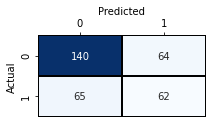

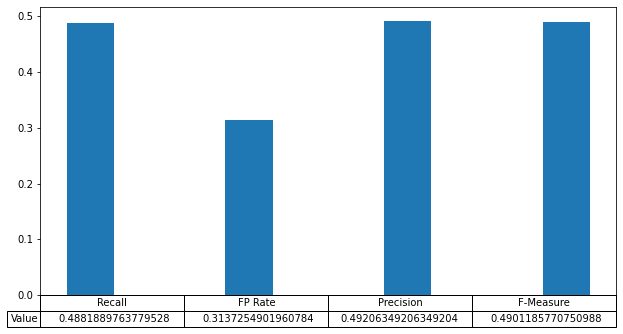

In [10]:
actual=[]
predicted=[]
total=0
correct=0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
        actual.append(group)
        predicted.append(vote)
print('Test Data Accuracy: {}%'.format(correct/total*100))
plot_experimental_results(plot_confusion_matrix(actual,predicted,classes_list))

###  Performing Normalization

In [11]:
train_set_norm={}
test_set_norm={}
group_max_list=[]
group_min_list=[]
for group in train_set:
    group_max_list.append(np.max(np.array(train_set[group])))
    group_min_list.append(np.min(np.array(train_set[group])))
    
maxim=max(group_max_list)
minim=min(group_min_list)
diffMaxMin=(maxim-minim)

for group in train_set:
    train_set_norm[group]=[]
    for data_row in train_set[group]:
        data_row_arr=(np.array(data_row)-minim)/diffMaxMin
        train_set_norm[group].append(list(data_row_arr))

for group in test_set:
    test_set_norm[group]=[]
    for data_row in test_set[group]:
        data_row_arr=(np.array(data_row)-minim)/diffMaxMin
        test_set_norm[group].append(list(data_row_arr))

### Making the Predictions after normalization

Test Data Accuracy: 60.72507552870091%


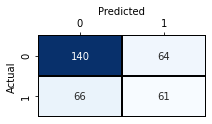

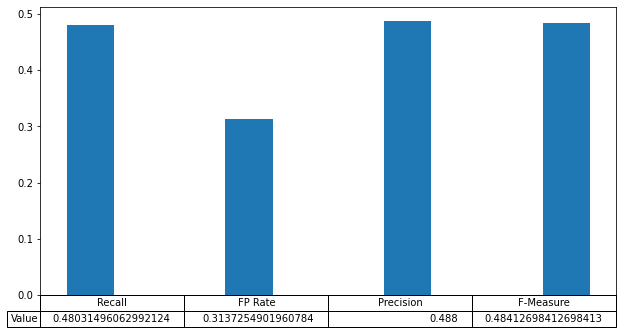

In [12]:
actual=[]
predicted=[]
total=0
correct=0
for group in test_set_norm:
    for data in test_set_norm[group]:
        vote = k_nearest_neighbors(train_set_norm, data, k=5)
        if group == vote:
            correct += 1
        total += 1
        actual.append(group)
        predicted.append(vote)
print('Test Data Accuracy: {}%'.format(correct/total*100))
plot_experimental_results(plot_confusion_matrix(actual,predicted,classes_list))

In [13]:
import ipywidgets as widgets
print("Please provide the details of person:")
@widgets.interact_manual(Pclass=(1,3,1),Sex=[('male',0),('female',1)],Age=(0,150,0.01),SibSp=(0,5,1),Parch=(0,6,1),Fare=(0.0, 512.3292,0.0001),Embarked=[('S',0), ('C',1), ('Q',2)])
def g(Pclass,Sex,Age,SibSp,Parch,Fare,Embarked):
    
    row_normalized=(np.array([Pclass,Sex,Age,SibSp,Parch,Fare,Embarked])-minim)/diffMaxMin
    Survived=k_nearest_neighbors(train_set_norm, row_normalized, k=5)
    
    if Survived==0:
        print("There is a very high probability that the above person didn't make it out alive.")
    else:
        print("There is a very high probability that the person made it out alive.")

Please provide the details of person:


interactive(children=(IntSlider(value=2, description='Pclass', max=3, min=1), Dropdown(description='Sex', opti…

## References
- Analytical Information Systems course by **Prof. Dr. Gefei Zhang** at **Hochschule Hof**
    - [Link to Profile: **Prof. Dr. Gefei Zhang**](https://people.f4.htw-berlin.de/~zhangg/)
    - [Link to Course Description at **Hochschule Hof, Bavaria**](https://www.hof-university.com/graduate-school/masters-program-full-time/software-engineering-for-industrial-applications-meng.html)